In [6]:
# Assignment 3 
import numpy as np
import pandas as pd
import time
import timeit
Table = []

In [7]:
'''Calculate the factorial of each of the numbers using a simple FOR loop.  
Please capture the start/end times and store the results in an array, or linked list, or dictionary'''
'''Set up an array of ten random numbers between 100 and 500 (just one array with 10 numbers).'''
np.random.seed(3)
array = np.random.randint(100, 500, 10)
array= list(np.sort(array))
run_time = []

fact_ls1 = []
for i in array:
    loop_start = time.clock()
    i = int(i)
    res = 1
    for j in range(1, i+1):
        res *= j
    loop_finish = time.clock()
    run_time.append([str(j), (loop_finish - loop_start)*1000])
    fact_ls1.append(res)
run_time = pd.DataFrame(run_time, columns=["number", "For Loop"])

In [16]:
# Recursion
'''Calculate the factorial of each of the numbers using recursion. 
Please capture the start/end times and store the results in an array, or linked list, or dictionary.'''
fact_ls2 = []
run_time_2 = []
def fact(x):
    if x == 1:
        return 1
    else:
        return x * fact(x-1)
for i in array:
    loop_start = time.clock()
    i = int(i)
    fact_ls2.append(fact(i))
    loop_finish = time.clock()
    run_time_2.append([str(i), (loop_finish - loop_start)*1000])
run_time_2 = pd.DataFrame(run_time_2, columns=["number", "Recursion"])

In [17]:
# I had this idea when working on this that maybe saving the result of the previous element will save sometime 
# So, this is just me trying my hypothesis, which by the way did not improve the runtime
# my guess though is that the higher/longer the loop maybe the lesser time it will take to find the factorial of bigger number.
# Notice here that, this theory only works if the list/array is sorted

def factorial2(res,ini, end):
    while ini <= end:
        res*=ini
        ini+=1
    return res
run_time_3 = []
val =[]
index = 0
loop_start = time.clock()
val.append(factorial2(1,1,int(array[index])))
loop_finish = time.clock()
run_time_3.append([array[index], loop_finish - loop_start])
for i in array[1:]:
    loop_start = time.clock()
    i = int(i)
    val.append(factorial2(val[index],array[index],i))
    index+=1
    loop_finish = time.clock()
    run_time_3.append([str(i), (loop_finish - loop_start)*1000])
run_time_3 = pd.DataFrame(run_time_3, columns=["number", "Extra loop"])

In [19]:
"""Organize the results of the study into a table showing the number, it's factorial, the time 
to calculate the factorial using recursion, the time to calculate factorial using FOR loop, 
and the difference between times."""

Table = run_time
Table["recursion"] =  run_time_2["Recursion"]
Table["Extra loop"] =  run_time_3["Extra loop"]

In [20]:
Table

,number,For Loop,recursion,Extra loop
0,231,0.1017,0.2038,0.000214
1,247,0.1009,0.1430,0.234400
2,252,0.1012,0.1403,0.063500
3,269,0.1127,0.1561,0.180700
4,302,0.1295,0.3076,0.328100
5,349,0.1639,0.2782,0.462100
6,356,0.1641,0.2298,0.079800
7,377,0.1784,0.2594,0.217300
8,462,0.2434,0.3665,1.318000
9,463,0.2353,0.3320,0.032100


In [21]:
import matplotlib.pyplot as plt

#plt.show()
def plot_result(data_1, data_2, data_3):
    ax = plt.gca()
    data_1.plot(x='number', y='For Loop', ax=ax)
    data_2.plot(x='number', y='Recursion', color="red", ax=ax)
    data_3.plot(x='number', y='Extra loop', color="green", ax=ax)
    #data.plot(y='Time in mil_sec', x='number')
    plt.show()

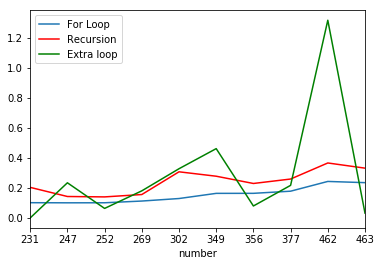

In [22]:
# run_time = for loop
# run_time_2 = Recursion
# run_time_3 = extra loop
plot_result(run_time, run_time_2, run_time_3)

### Extra Credit
I've never used tail recursion before and at first I didn't want to look at this extra credit exercice until I started reading about this topic and I found these set of codes during my research https://chrispenner.ca/posts/python-tail-recursion
This is amazing!!!

In [23]:
""" Taken from https://chrispenner.ca/posts/python-tail-recursion"""
# tail_recursion.py
class Recurse(Exception):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs

def recurse(*args, **kwargs):
    raise Recurse(*args, **kwargs)
        
def tail_recursive(f):
    def decorated(*args, **kwargs):
        while True:
            try:
                return f(*args, **kwargs)
            except Recurse as r:
                args = r.args
                kwargs = r.kwargs
                continue
    return decorated

@tail_recursive
def factorial(n, accumulator=1):
    if n == 0:
        return accumulator
    recurse(n-1, accumulator=accumulator*n)

In [24]:
# Regular recursion
# as expected getting the following error 
#RecursionError: maximum recursion depth exceeded in comparison
fact(4000)

RecursionError: maximum recursion depth exceeded in comparison

In [25]:
# Tail recursion fix that issue
factorial(4000)

1828801951514065013314743175573919044217377710730439219706452695420895979797317736485037028687048410733644304156928557175467246186154355733394261561795699671674528483159731749881876093748280498041957651294872061055892812978809780062059342953770532674062445388428509174395175674614444736237872246943619457592957990011421297336065899807397771469726120504866372593633749040406609796663717025402134880094428034228535594664968131626016345974380357717590339473317007684176477908216689118452932423003341414549780183259821851840655225709739253002458273898291910440678216870887149560350190586739996629879853487774792317919579141650440805487897477030865070712087883762498657607334044941485457836738330171570635819412740084985560408047330519683348240807942096427518753888911529665552239772392488715462481065978832100562055836960477865790477191838805431925151398195429674168844724618502125040222501011643301681858803669018017769146177971310430164039570827473470118677275696606461102365652876513873570419087620069

## Executive Summary
It was no surprise to see that the for loop behave better that the recursion. It’s faster than the recursion. After taking a closer look at the “extra” loop, it does make sense to have a big fluctuation. The reason is because the numbers are not continuous and the differences between them vary greatly. My guess is that if the input data had more continuous set of numbers (2,3,4,5,6, …, 90), it would have behaved better than the recursion and for loop.  Even though, the recursion has a less code and it’s clearer, it has more overhead and take more time to run compare to the simple loop. The state of each recursion call is saved on the stack until the value is used and returned; for instance:
Fact(3) -> fact(2)-> fact(1)
Fact(3) -> fact(2)
Fact(3)
Fact (3) will be needed until the end. 
For all these types of operations (for loop, extra loop and recursion) the space complexity is O(n).
